In [257]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot
%matplotlib inline 
import seaborn as sns

In [258]:
data=pd.read_csv("Downloads\\Amazon Sales data.csv")

In [259]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [260]:
data.shape

(100, 14)

In [261]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [263]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [264]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [265]:
# Changing the data type of different column for model training and analysis 
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [266]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [267]:
# Using describe function on dataframe for getting basic stats of numerical dataset 
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [268]:
# Adding extra column to dataframe which contain only month, year and month with year 
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [269]:
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')

In [270]:
 data = data.drop(columns=['Order Date'])   

In [271]:
# Saving the data dataframe to df 
df = data

In [272]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [273]:
# Display total values of all country 
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

Country
The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote

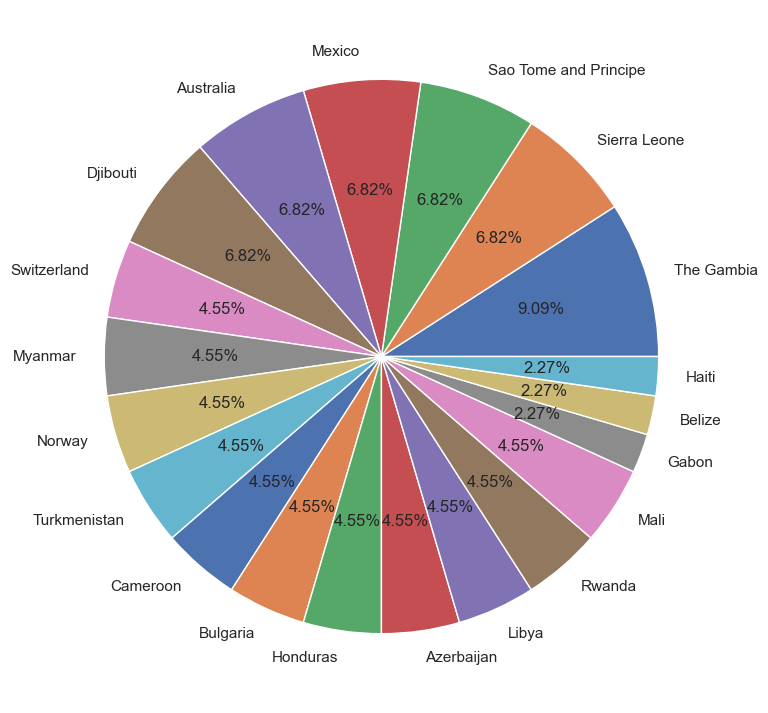

In [274]:
import matplotlib.pyplot as plt 
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

In [275]:
#Total Profit

In [276]:
np.mean(df['Total Profit'])

441681.98399999994

In [277]:
np.max(df['Total Profit'])

1719922.04

In [278]:
np.min(df['Total Profit'])

1258.02

In [279]:
np.var(df['Total Profit'])

190392340968.9648

In [280]:
np.std(df['Total Profit'])

436339.7082193699

In [281]:
np.average(df['Total Profit'])

441681.98399999994

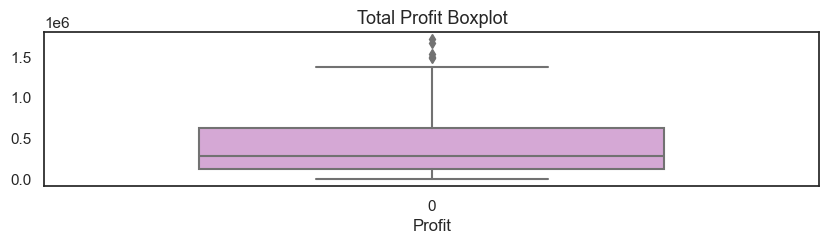

In [282]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [283]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [284]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [285]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [286]:
list_length = len(outliers)

In [287]:
# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


In [288]:
#Total cost

In [289]:
np.mean(df['Total Cost'])

931805.6991000001

In [290]:
np.median(df['Total Cost'])

363566.385

In [291]:
np.std(df['Total Cost'])

1078504.9435267276

In [292]:
np.var(df['Total Cost'])

1163172913211.59

In [293]:
np.percentile(df['Total Revenue'],50,axis=0,overwrite_input=True)

752314.36

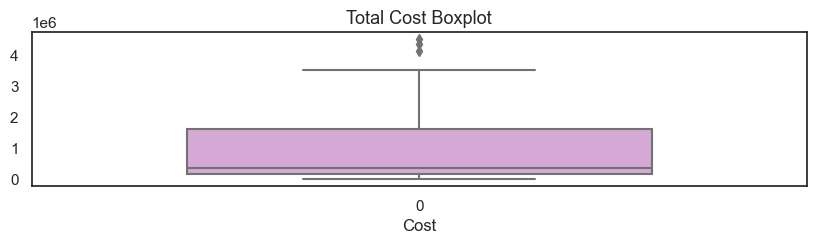

In [294]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [295]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [296]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                    221117.0
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [297]:
print(outliers)

[13, 33, 38, 68, 75]


In [298]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


In [299]:
#REVENUE

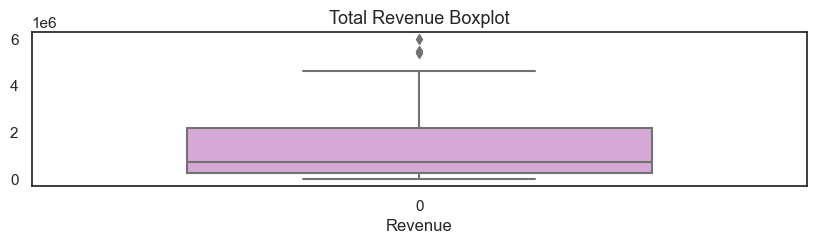

In [300]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [301]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [302]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                   Sub-Saharan Africa
Country                          The Gambia
Item Type                         Baby Food
Sales Channel                       Offline
Order Priority                            M
Order ID                          494747245
Ship Date               2014-03-20 00:00:00
Units Sold                             5559
Unit Price                           255.28
Unit Cost                            159.42
Total Revenue                    4647149.58
Total Cost                        886215.78
Total Profit                      532885.74
Order Month                               2
Order Year                             2014
Order Date MonthYear                2014-02
Name: 87, dtype: object
Region                  Middle East and North Africa
Country                                       Kuwait
Item Type                                     Fruits
Sales Channel                                 Online
Order Priority                                     M
Order I

In [303]:
print(outliers)

[87, 88, 91, 95, 96, 99]


In [304]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


In [305]:
#unit cost

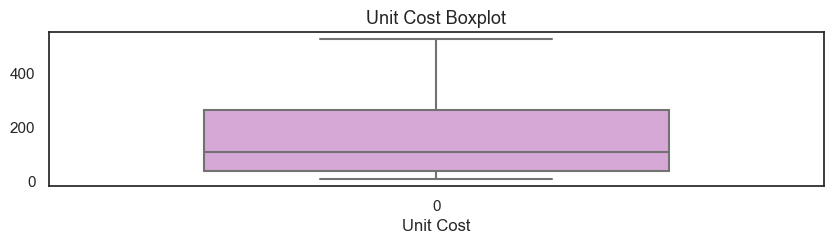

In [306]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

In [307]:
#unit price

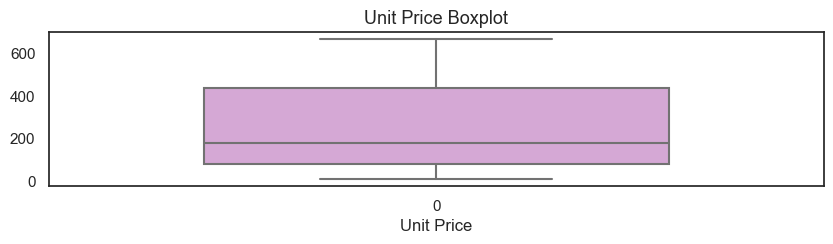

In [308]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

In [309]:
#unit sold

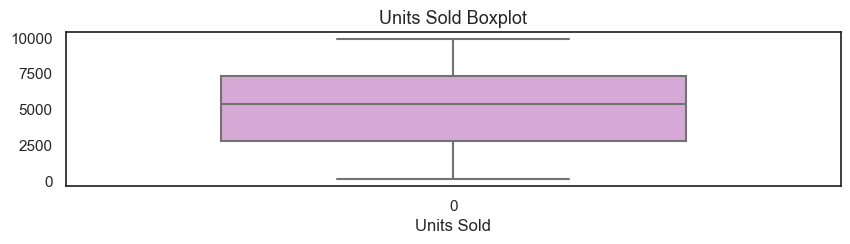

In [310]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

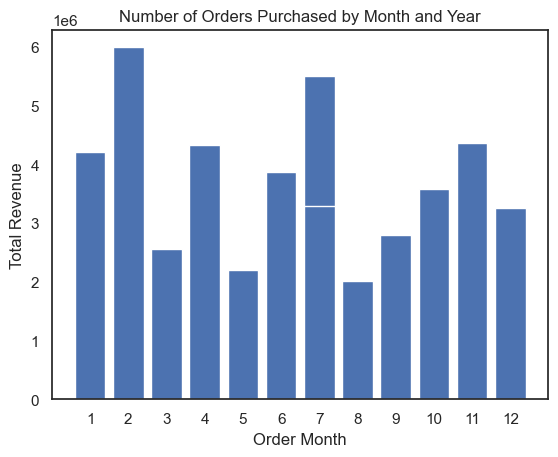

In [311]:
# A bar chart for Total Revenue and Order Month 
plt.bar(df['Order Month'], df['Total Revenue'])
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.show()

Text(0.5, 1.0, 'Profit per year')

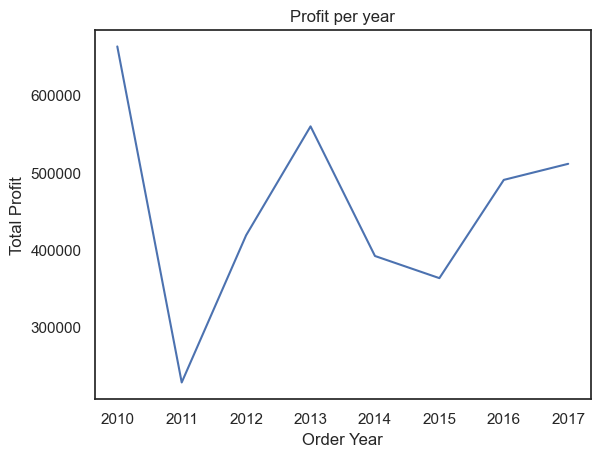

In [312]:
# Plot line graph of Total Profit and Order Year
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

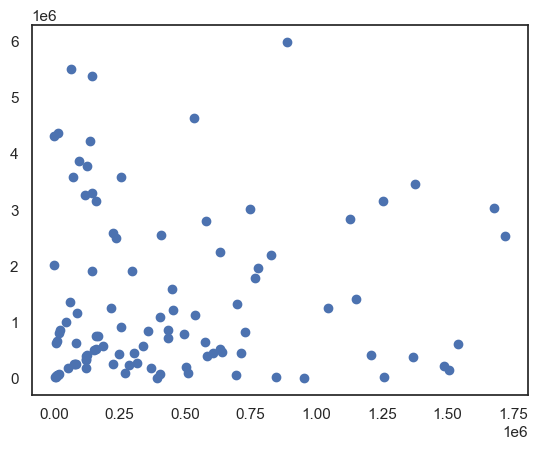

In [313]:
plt.scatter(df['Total Profit'],df['Total Revenue'])

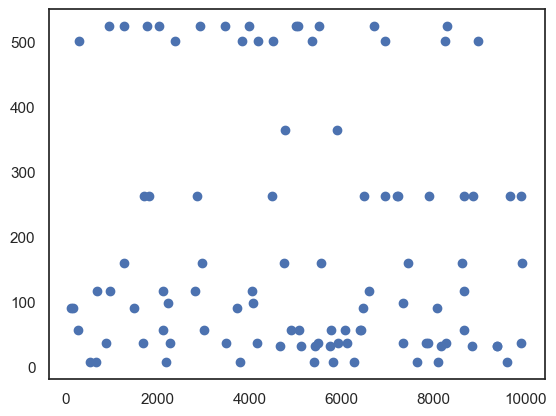

In [314]:
plt.scatter(df['Units Sold'],df['Unit Cost'])

array([<Axes: xlabel='Units Sold'>], dtype=object)

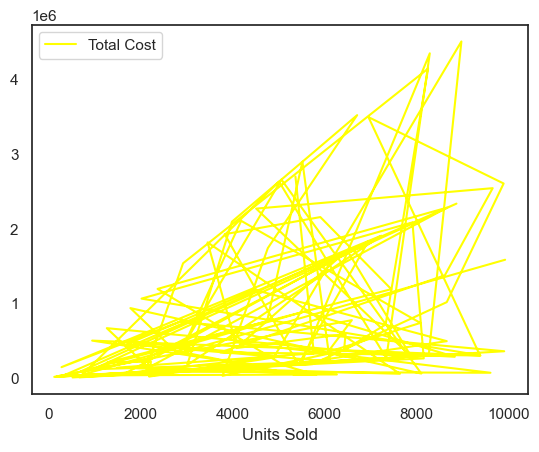

In [315]:
df.plot.line(x='Units Sold',y='Total Cost',subplots=True,color={'Total Cost': 'yellow'})

Text(0, 0.5, 'Total Profit')

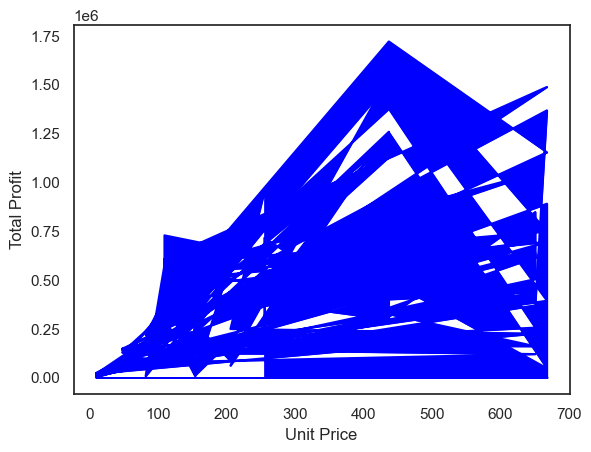

In [316]:
area_plot = df.plot.area(x='Unit Price',y='Total Profit',color='blue',stacked=True,legend=None)
plt.ylabel('Total Profit')

Text(0, 0.5, 'Total Profit')

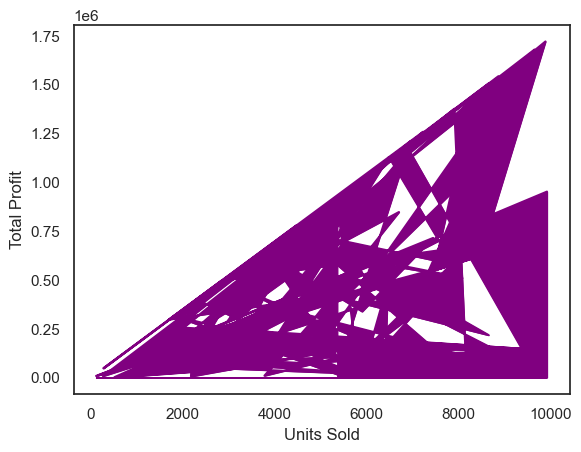

In [317]:
df.plot.area(x='Units Sold',y='Total Profit',color='purple',legend=None)
plt.ylabel('Total Profit')

Text(0, 0.5, 'Total Cost')

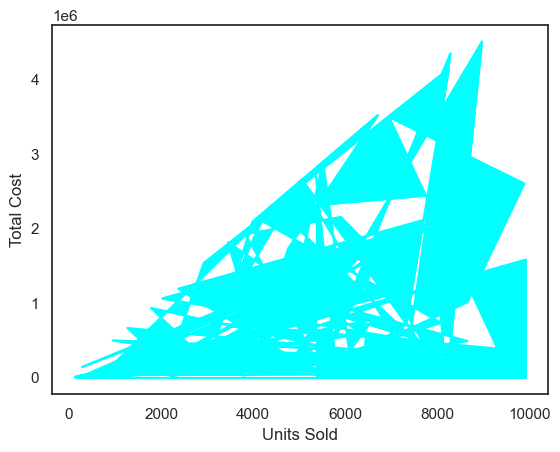

In [318]:
df.plot.area(x='Units Sold',y='Total Cost',color='aqua',legend=None)
plt.ylabel('Total Cost')

Text(0, 0.5, 'Total Revenue')

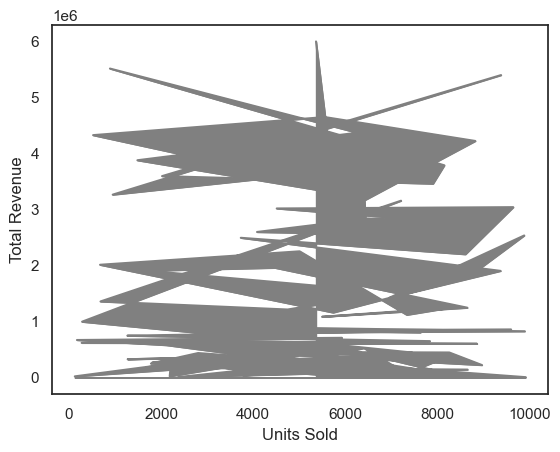

In [319]:
df.plot.area(x='Units Sold',y='Total Revenue',color='grey',legend=None)
plt.ylabel('Total Revenue')

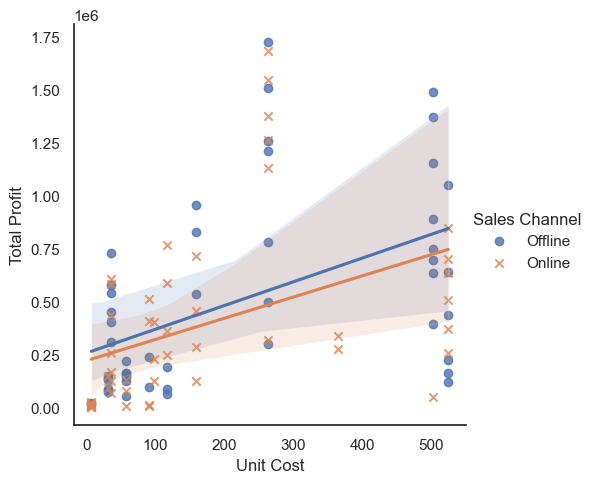

In [320]:
sns.lmplot(x='Unit Cost',y='Total Profit',data=df,height=5,aspect=1,hue='Sales Channel',logx=False,truncate=True,ci=100,y_jitter=2.2,scatter=True,fit_reg=True,markers=['o','x'])

In [321]:
#From the above LM plot, we can infer that profit keeps on increasing with increase in unit cost.

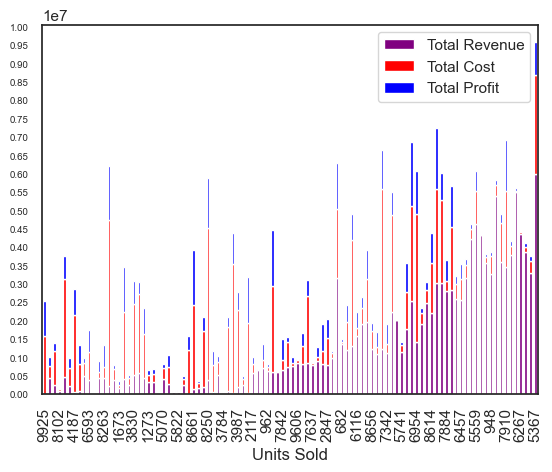

In [322]:
bar_plot = df.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['purple','red','blue'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=38)
plt.tick_params(axis='y', which='major', labelsize=7)

In [323]:
# Calculating the total revenue for each group with respect to Item Type and then sorting then in descending order
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          21136509.24
Beverages          20551626.25
Clothes            17021358.98
Office Supplies    14403310.76
Household          12618074.65
Fruits             12599539.92
Personal Care      10576116.00
Vegetables          9713153.18
Baby Food           9062365.85
Cereal              5995019.60
Snacks              3007117.98
Meat                 664575.90
Name: Total Revenue, dtype: float64

In [324]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [325]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000   -0.021539      0.029844
Total Cost         -0.021539    1.000000      0.804091
Total Profit        0.029844    0.804091      1.000000


In [326]:
import warnings
warnings.filterwarnings('ignore')

In [327]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [328]:
# Drop columns Region, Country, Order Date MonthYear, Order ID and Ship Date 
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [329]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,4870.26,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,435466.90,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,247956.32,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,471336.91,2657347.52,639077.50,2,2013


In [330]:
df.cov()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
Item Type,10.154646,0.075758,0.796869,-2.119174e+03,1.550902e+02,1.614850e+02,-4.622407e+05,4.542172e+05,-1.814911e+05,0.359798,-0.121111
Sales Channel,0.075758,0.252525,0.085859,-2.055202e+02,-1.715116e+01,-1.301768e+01,-1.427639e+05,-7.660402e+04,-2.865280e+04,-0.080808,0.005051
Order Priority,0.796869,0.085859,1.120303,-2.167714e+02,4.469241e+01,3.883014e+01,5.290370e+04,1.693008e+05,2.717607e+04,-0.325455,-0.149596
Units Sold,-2119.174040,-205.520202,-216.771414,7.809144e+06,-4.640481e+04,-4.850918e+04,3.274260e+08,1.135124e+09,6.918495e+08,-74.923838,72.683535
Unit Price,155.090233,-17.151162,44.692413,-4.640481e+04,5.550370e+04,4.377593e+04,-1.374388e+07,2.012054e+08,5.758482e+07,-25.214988,-30.399494
Unit Cost,161.485010,-13.017677,38.830141,-4.850918e+04,4.377593e+04,3.542232e+04,-1.269463e+07,1.580833e+08,3.856216e+07,-26.517354,-28.127414
Total Revenue,-462240.691114,-142763.883283,52903.698730,3.274260e+08,-1.374388e+07,-1.269463e+07,2.131684e+12,-3.408793e+10,1.910834e+10,159217.856863,-417698.919508
Total Cost,454217.176179,-76604.015909,169300.764165,1.135124e+09,2.012054e+08,1.580833e+08,-3.408793e+10,1.174922e+12,3.822231e+11,-56763.151481,-115210.724134
Total Profit,-181491.066687,-28652.802727,27176.072242,6.918495e+08,5.758482e+07,3.856216e+07,1.910834e+10,3.822231e+11,1.923155e+11,75537.477333,2010.645333
Order Month,0.359798,-0.080808,-0.325455,-7.492384e+01,-2.521499e+01,-2.651735e+01,1.592179e+05,-5.676315e+04,7.553748e+04,11.244848,-0.747273


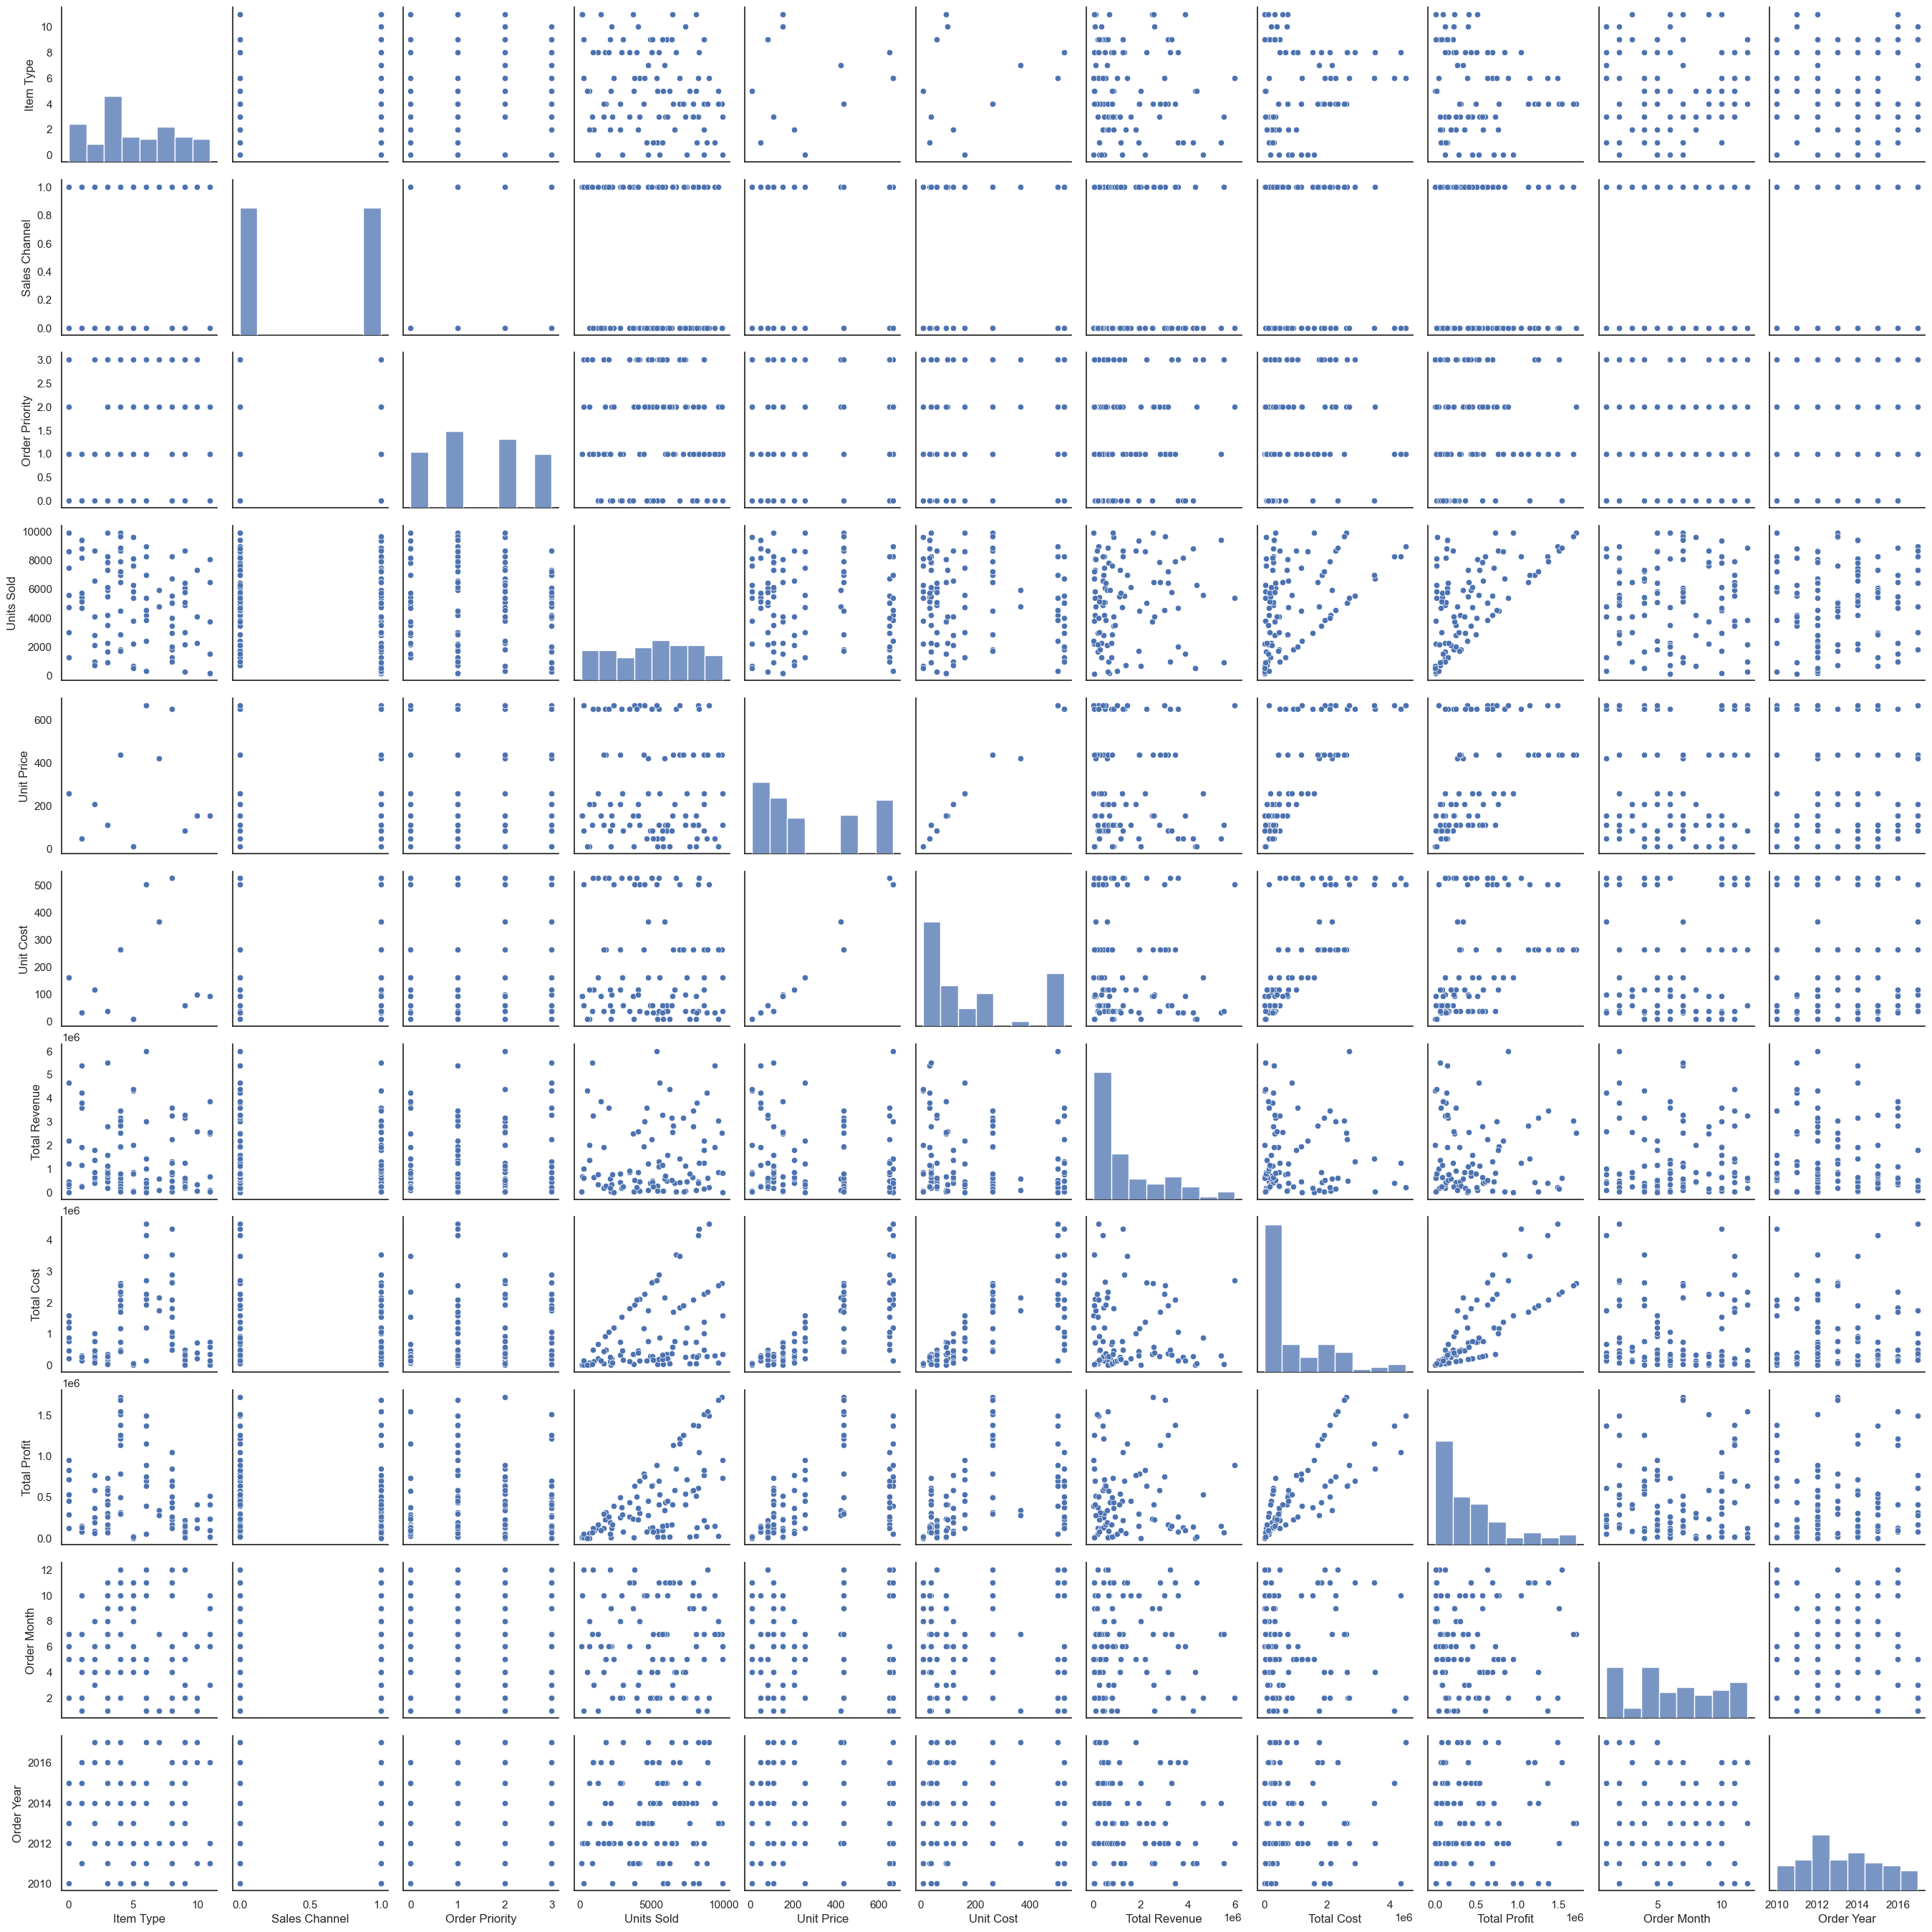

In [331]:
sns.pairplot(df)

<Axes: >

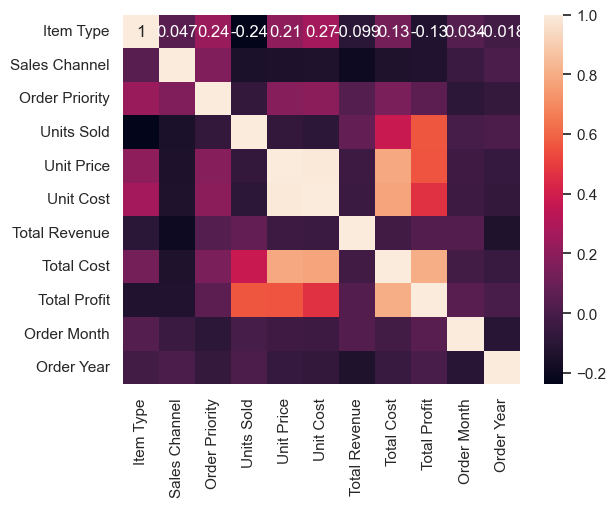

In [332]:
sns.heatmap(df.corr(),annot=True)

In [333]:
#prediction...

In [334]:
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

In [335]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
# Standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [337]:
# Performing fit transform on X_train dataframe 
X_train = scaler.fit_transform(X_train)

In [338]:
# Performing transform on X_test dataframe 
X_test = scaler.transform(X_test)

In [339]:
# Applying Linear Regression on X_train and y_train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [340]:
# Calculating mean squared error 
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [341]:
np.mean(mse)

-15255186176.670282

In [342]:
## prediction 
reg_pred = regression.predict(X_test)

In [343]:
reg_pred

array([ 208192.60250249,  392508.92543095,  667219.435758  ,
        110391.9834907 ,  457740.66219825,  469772.04977741,
        102412.71409508,  800928.99608871,    4847.23276108,
        871802.56757238,  686704.66185942, 1339282.25483319,
        732219.80482019, 1388215.51108883,  -43607.75256582,
        627513.46052791,  299412.45257405,  238954.5985345 ,
        536668.70015791,  -56077.18844879,  293247.90484298,
       -226891.37235381,   26408.43870545,  209550.29848811,
        471023.68852941,  191445.43257938,  -12531.17279198,
         46626.42923937,  566803.98478096,   74464.93743837])

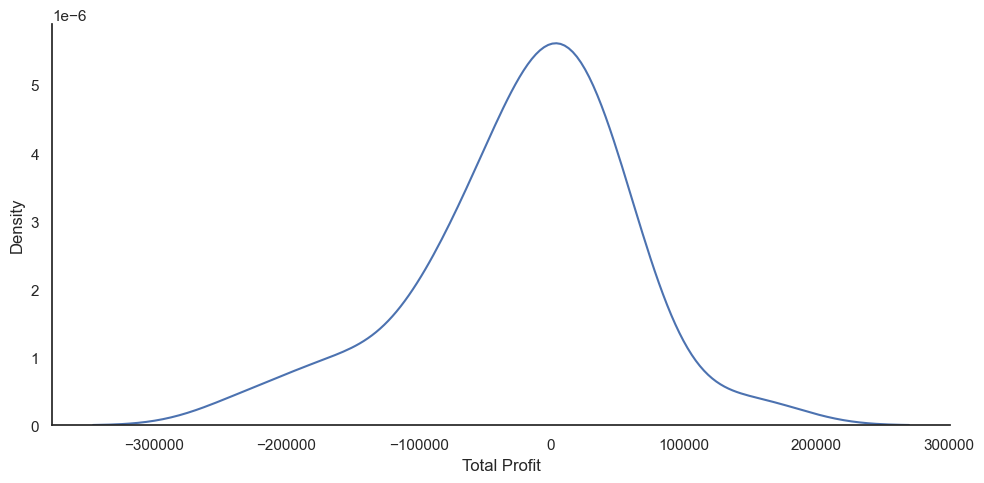

In [344]:
# Creating kernel density estimate plot 
import seaborn as sns 
sns.displot(reg_pred - y_test,kind='kde', height=5, aspect=2)

In [345]:
# Finding Accuracy percentage on the bases of r2 score 
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)

# Calculate the percentage of accuracy
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

Accuracy: 95.79%


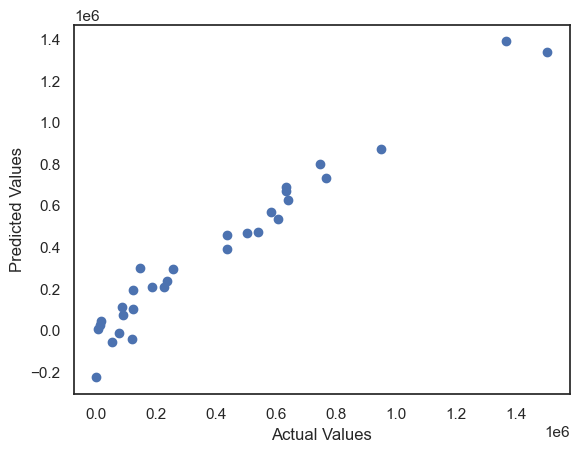

In [346]:
# Plot the predicted values against the actual values to visualize how well the model is fitting the data.
import matplotlib.pyplot as plt

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [347]:
# Calculate the mean squared error (MSE) or root mean squared error (RMSE) to quantify the model's performance.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 6235319368.743605
RMSE: 78964.03845259945


In [348]:
import plotly.graph_objs as go

In [349]:
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

In [350]:
# Create a copy of the X_train numpy array with modified column names
X_train_df = pd.DataFrame(X_train, columns=['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year'])

In [351]:
coef = reg.coef_

In [352]:
# Create a DataFrame with the coefficients and feature names
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': coef})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

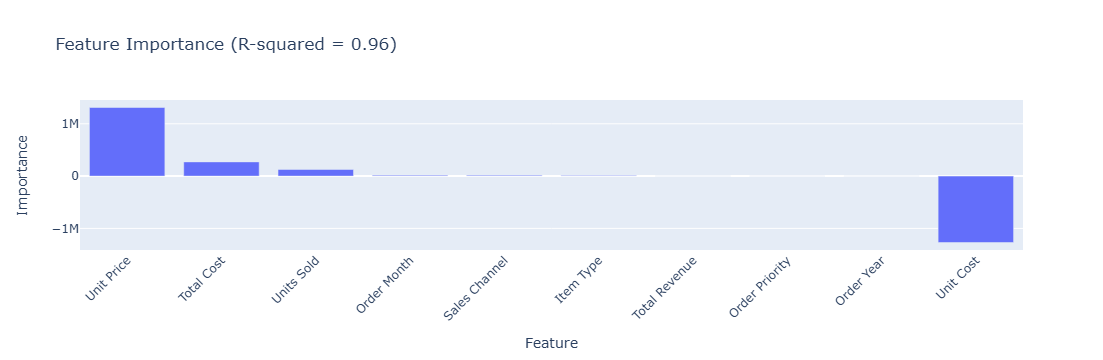

In [353]:
# Create a bar chart of the feature importances using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_importances['Feature'], y=feature_importances['Importance']))
fig.update_layout(title='Feature Importance (R-squared = {:.2f})'.format(r2),
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  xaxis_tickangle=-45)
fig.show()
